In [9]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

import networkx as nx
import igviz as ig

In [10]:
coartists = []
with open('artists_small.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        coartists.append(line)
        #print(line)

In [11]:
coartists_copy = set(coartists)
coartists_copy = [line.split('<--->') for line in coartists_copy]
coartists_copy = [line[:-1] for line in coartists_copy]
for line in coartists_copy:
    line[-1] = int(line[-1])
    
len(coartists_copy)

825

In [12]:
filename = 'full_artists_dict'
infile = open(filename,'rb')
artist_dict = pickle.load(infile)
infile.close()

In [13]:
artist_dict.keys()

dict_keys(['country_mb', 'tags_mb', 'listeners_lastfm'])

In [14]:
G = nx.Graph()
for colab in coartists_copy:
    if len(colab) > 1:
        for combo in itertools.combinations(colab[:-1], 2):
            if not G.has_edge(*combo):
                G.add_edge(*combo,weight=colab[-1]/len(colab[:-1])) # distribute weight so if 2 artists colab, they each get half credit
            else:
                G[combo[0]][combo[1]]['weight'] += colab[-1]/len(colab[:-1])
                
nx.set_node_attributes(G, artist_dict['country_mb'], 'country')
nx.set_node_attributes(G, artist_dict['tags_mb'], 'tags')
nx.set_node_attributes(G, artist_dict['listeners_lastfm'], 'listeners')
        
nx.write_weighted_edgelist(G, 'artists_network.edgelist', encoding='utf-8', delimiter='<--->')

In [15]:
print('Nodes: ', len(G.nodes))
print('Edges: ', len(G.edges))

Nodes:  601
Edges:  1112


In [16]:
G.nodes['Kanye West']

{'country': 'United States',
 'tags': ['synthpop', 'pop', 'american', 'hip-hop', 'hip hop'],
 'listeners': 0.8158408136514885}

<function matplotlib.pyplot.show(close=None, block=None)>

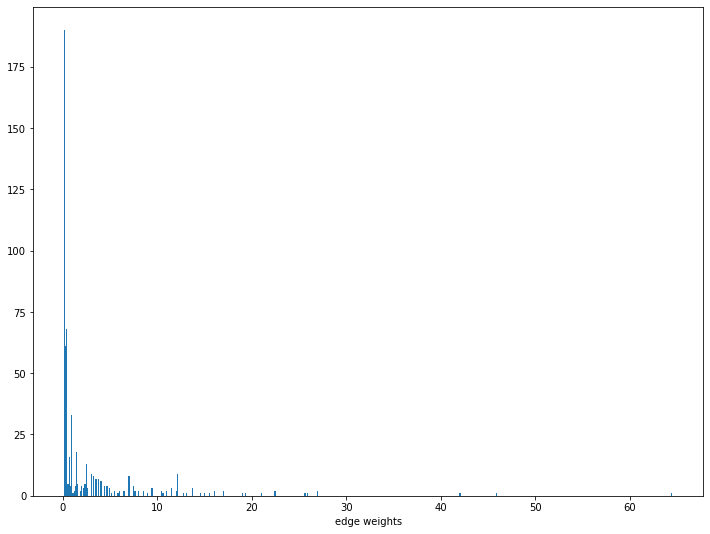

In [40]:
plt.figure(figsize=(12,9))
edge_weights = []
for u, v, data in G.edges(data=True):
    edge_weights.append(data['weight'])
    
plt.hist(edge_weights,500)
plt.xlabel('edge weights')
plt.show

In [29]:
plt.figure(figsize=(12,9))
edge_weights = []
idx = []
for u, v, data in G.edges(data=True):
    edge_weights.append(data['weight'])
    
#sns.histplot(data=edge_weights)
#plt.xlabel('edge weights')
#plt.show

<Figure size 864x648 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

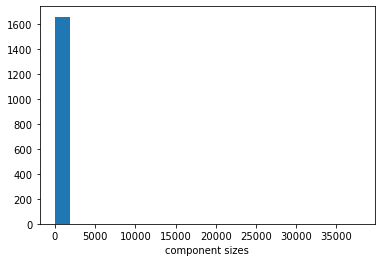

In [37]:
component_sizes = []
for component in nx.connected_components(G):
    component_sizes.append(len(component))
    
plt.hist(component_sizes,20)
plt.xlabel('component sizes')
plt.show

In [20]:
#for component in nx.connected_components(G):
#    print(component, '\n\n\n')

In [21]:
#for u, v, data in G.edges(data='weight'):
#    print(u,v,data)

In [65]:
from pyvis.network import Network

In [122]:
net = Network(height='1200px', width='1800px',notebook=False,
              bgcolor='#222222', font_color='white')
net.from_nx(G)

In [123]:
for i in range(len(net.nodes)):
    try:
        #print(i)
        net.nodes[i]['size'] = net.nodes[i]['listeners']*100
    except:
        pass

In [124]:
net.nodes[2]

{'country': 'United Kingdom',
 'tags': 'australian',
 'listeners': 0.007422187626763729,
 'size': 0.7422187626763729,
 'id': 'Frank Ifield',
 'label': 'Frank Ifield',
 'shape': 'dot',
 'font': {'color': 'white'}}

In [125]:
net.show_buttons(filter_=['physics'])
net.show('graph.html')